In [12]:
cosi_path="/mnt/file2/changye/dataset/Align-Anything-preference_interp/AA_preference_cosi_weight/cosi_feature_list.txt"
text_path="/mnt/file2/changye/dataset/Align-Anything-preference_interp/AA_preference_cosi_weight/text_feature_list.txt"
image_path="/mnt/file2/changye/dataset/Align-Anything-preference_interp/AA_preference_cosi_weight/image_feature_list.txt"
cosi2_path="/mnt/file2/changye/dataset/Align-Anything-preference_interp/AA_cooccur_0_25/cosi_feature_list.txt"
cosi_dict = {}
text_list=[]
image_list=[]
cosi2_dict = {}
with open(cosi_path, "r") as f:
    for line in f:
        key, value = line.strip().split(",")  # 按逗号分割每行
        cosi_dict[int(key)] = float(value)    # 将 key 转为 int, value 转为 float
with open(text_path, "r") as f:
    for line in f:
        text_list.append(int(line.strip()))
with open(image_path, "r") as f:
    for line in f:
        image_list.append(int(line.strip()))
with open(cosi2_path, "r") as f:
    for line in f:
        key, value = line.strip().split(",")  # 按逗号分割每行
        cosi2_dict[int(key)] = float(value)    # 将 key 转为 int, value 转为 float

In [17]:
text_feature_number=len(text_list)
image_feature_number=len(image_list)
cosi_feature_number=len(cosi_dict)
dead_feature_number=65536-cosi_feature_number-text_feature_number-image_feature_number


0.17626373522939126


Llava-mistral average cosi 0.17812341294984488
coocur-0.25 average cosi 0.17626373522939126
Llava-mistral cosi variance 0.004177405238223784
coocur-0.25 cosi variance 0.0038124648347595074


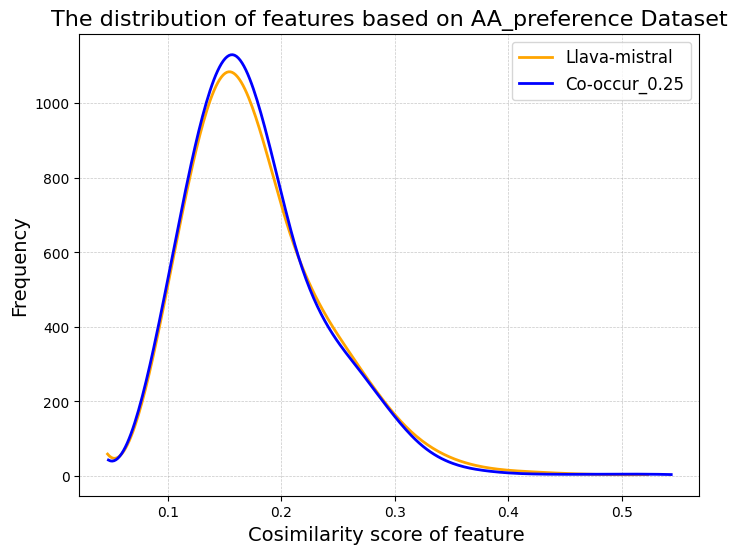

In [19]:

import matplotlib.pyplot as plt
import numpy as np

from scipy.interpolate import make_interp_spline
from collections import Counter
cosi_value_list=np.array(list(cosi_dict.values()))
cosi2_value_list=np.array(list(cosi2_dict.values()))
print("Llava-mistral average cosi",cosi_value_list.mean())
print("coocur-0.25 average cosi",cosi2_value_list.mean())
#方差
print("Llava-mistral cosi variance",cosi_value_list.var())
print("coocur-0.25 cosi variance",cosi2_value_list.var())

# 统计频率
num_bins = 10

# 生成直方图
frequencies, bin_edges = np.histogram(cosi_value_list, bins=num_bins)
frequencies2, bin_edges2 = np.histogram(cosi2_value_list, bins=num_bins)

# 计算每个区间的中心点（用于插值）
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2

# 使用样条插值将直方图转换为平滑曲线
bin_centers_smooth = np.linspace(bin_centers[0], bin_centers[-1], 300)  # 插值点
frequencies_smooth = make_interp_spline(bin_centers, frequencies)(bin_centers_smooth)

bin_centers_smooth2 = np.linspace(bin_centers2[0], bin_centers2[-1], 300)  # 插值点
frequencies_smooth2 = make_interp_spline(bin_centers2, frequencies2)(bin_centers_smooth2)

plt.figure(figsize=(8, 6))
plt.plot(bin_centers_smooth, frequencies_smooth, color='orange', lw=2, label='Llava-mistral')
plt.plot(bin_centers_smooth2, frequencies_smooth2, color='blue', lw=2, label='Co-occur_0.25')




# 样式设置
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Cosimilarity score of feature ', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('The distribution of features based on AA_preference Dataset', fontsize=16)
plt.legend(fontsize=12)
plt.show()